In [1]:
using QuantumOptics
using PyPlot

/home/hhs/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
N = 100
b = NLevelBasis(N)
t = 1
Htb = SparseOperator(b)
for i in 1:N-1
    Htb += -t*transition(b,i+1,i)
end
# PBC
Htb += -t*transition(b,1,N)
Htb += Htb'

Operator(dim=100x100)
  basis: NLevel(N=100)sparse([2, 100, 1, 3, 2, 4, 3, 5, 4, 6  …  95, 97, 96, 98, 97, 99, 98, 100, 1, 99], [1, 1, 2, 2, 3, 3, 4, 4, 5, 5  …  96, 96, 97, 97, 98, 98, 99, 99, 100, 100], ComplexF64[-1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im  …  -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im, -1.0 + 0.0im], 100, 100)

In [10]:
Nparticles = 2
b_mb = ManyBodyBasis(b, bosonstates(b, Nparticles))

ManyBody(onebodybasis=NLevel(N=100), states:5050)

In [11]:
b_mb.occupations

5050-element QuantumOpticsBase.SortedVector{Vector{Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}:
 [2, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 1, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 1, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 1, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 1, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 1, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 1, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 1, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 1  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
 ⋮
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 0  …  0

In [12]:
H_mb = manybodyoperator(b_mb, Htb)
Emb, Umb = eigenstates(dense(H_mb));
Emb

5050-element Vector{Float64}:
 -3.9999999999999987
 -3.996053456856544
 -3.996053456856543
 -3.9921069137130916
 -3.9921069137130902
 -3.9921069137130876
 -3.9842294026289573
 -3.9842294026289564
 -3.980282859485501
 -3.980282859485499
 -3.9802828594854986
 -3.9802828594854973
 -3.9684588052579186
  ⋮
  3.9802828594854986
  3.9802828594854986
  3.9802828594854986
  3.980282859485499
  3.9842294026289555
  3.9842294026289555
  3.9921069137130862
  3.9921069137130862
  3.9921069137130862
  3.996053456856543
  3.996053456856543
  4.0

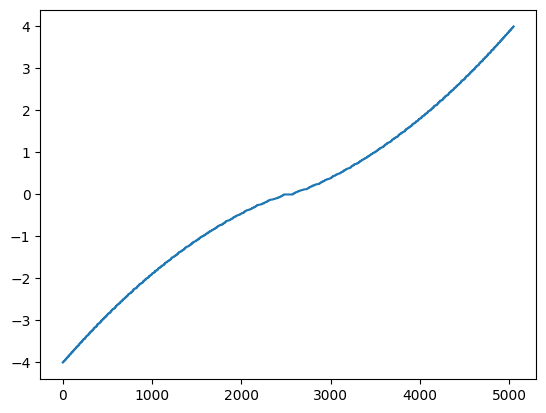

1-element Vector{PyCall.PyObject}:
 PyObject <matplotlib.lines.Line2D object at 0x7fb2e12541f0>

In [13]:
plot(Emb)